# Titanic

## 0 - Collect

The Titanic dataset can be download in the [kaggle website](https://www.kaggle.com/c/titanic/data)

## 1 - Prepare

In [1]:
import pandas as pd

train = pd.read_csv('./titanic_train.csv')
test = pd.read_csv('./titanic_test.csv')

## 3 - Selection

In [2]:
train = pd.get_dummies(train, columns=['Sex'])

feature_cols = ['Pclass', 'Age', 'Sex_female', 'Sex_male', 'SibSp', 'Parch', 'Fare']

X = train[feature_cols].fillna(-1)
y = train.Survived

## 4 - Training

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(445, 7) (446, 7) (445,) (446,)


In [4]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedKFold

result = []

kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for line_train, line_valid in kf.split(X):

    X_train, X_valid = X.iloc[line_train], X.iloc[line_valid]
    y_train, y_valid = y.iloc[line_train], y.iloc[line_valid]

    rfc = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)
    rfc.fit(X_train,y_train)
    rfc_y_pred_target = rfc.predict(X_valid)

    acc = np.mean(y_valid == rfc_y_pred_target)
    result.append(acc)

print("mean:", np.mean(result))

mean: 0.8033632286995516


before mean: 0.785294117647059

Populating the interactive namespace from numpy and matplotlib


(array([3., 0., 0., 3., 2., 4., 4., 0., 2., 2.]),
 array([0.75630252, 0.76358543, 0.77086835, 0.77815126, 0.78543417,
        0.79271709, 0.8       , 0.80728291, 0.81456583, 0.82184874,
        0.82913165]),
 <a list of 10 Patch objects>)

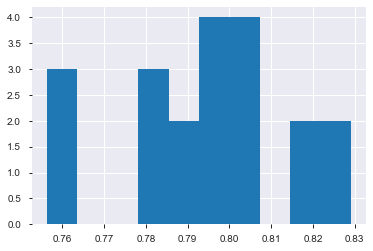

In [10]:
%matplotlib inline
%pylab inline
pylab.hist(result)

In [8]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train,y_train)
logreg_y_pred_target = logreg.predict(X_test)

In [9]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
rfc_y_pred_target = rfc.predict(X_test)

## 5 - Evaluation

In [61]:
from sklearn import metrics

def evaluate(y_test, y_pred_target):
    """
    accuracy = y_test == y_pred_target
    precision =  tp / (tp + fp) or ratio False Positive as Positive
    recall =  tp / (tp + fn) or ratio all the positive samples
    """

    acc = metrics.accuracy_score(y_test, y_pred_target)
    pre = metrics.precision_score(y_test, y_pred_target)
    rec = metrics.recall_score(y_test, y_pred_target)
    
    return dict(
        accuracy=f"{acc:.2f}", precision=f"{pre:.2f}", recall=f"{rec:.2f}"
    )

print('logreg:', evaluate(y_test, logreg_y_pred_target))
print('rfc:', evaluate(y_test, rfc_y_pred_target))

logreg: {'accuracy': '0.78', 'precision': '0.71', 'recall': '0.69'}
rfc: {'accuracy': '0.90', 'precision': '0.87', 'recall': '0.84'}


## 6 - Subimit

In [162]:
test = pd.read_csv('./titanic_test.csv')
test = pd.get_dummies(test, columns=['Sex'])

feature_cols = ['Pclass', 'Age', 'Sex_female', 'Sex_male', 'SibSp', 'Parch', 'Fare']

X = test[feature_cols].fillna(-1)

y = logreg.predict(X)

sub = pd.Series(y, index=test['PassengerId'], name='Survived')
sub.to_csv('first_model_lgr.csv', header=True)

In [163]:
!head -n 10 first_model.csv

PassengerId,Survived
892,0
893,0
894,1
895,1
896,0
897,0
898,0
899,0
900,1
